In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from google.colab import files
import io

In [ ]:
uploaded = files.upload()

Saving bike_day.csv to bike_day.csv


In [ ]:
# Wczytajmy dane
df = pd.read_csv(io.BytesIO(uploaded['bike_day.csv']))
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Przypianie atemp jako zmienną niezależną i cnt jako zmienną zależną
# temp -> temperatura odczuwalna danego dnia
# cnt -> ilość wypożyczonych rowerów danego dnia

X = df[['atemp']]
y = df['cnt']

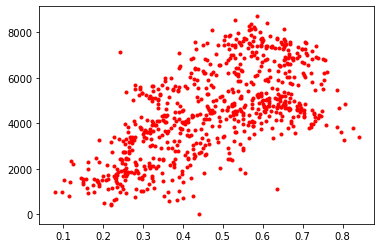

In [ ]:
# wykres porównujący atemp z cnt
plt.plot(df.atemp, df.cnt, 'r.')
plt.show()

In [ ]:
X = np.column_stack(([1]*len(X), X)) # funkcja wymaga aby X była dwuwymiarowa. 

def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    cost_array = np.empty([numIterations, 2])
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        cost_array[i][0] = i
        cost_array[i][1] = cost
        gradient = np.dot(xTrans, loss) / m
        theta = theta - alpha * gradient
    return theta, cost_array

In [ ]:
# Przy wykorzystaniu powyższej funkcji ćwiczę model (osiągfam minimum lokalne funkcji kosztu). 
m=len(X)
numIterations= 3000
alpha = 0.1
theta = [0,0]
theta, cost_array = gradientDescent(X, y, theta, alpha, m, numIterations)
print(theta)

Iteration 0 | Cost: 12018406.441176
Iteration 1 | Cost: 9602195.925103
Iteration 2 | Cost: 7743383.111946
Iteration 3 | Cost: 6313285.769408
Iteration 4 | Cost: 5212929.980661
Iteration 5 | Cost: 4366191.511097
Iteration 6 | Cost: 3714520.598765
Iteration 7 | Cost: 3212884.610151
Iteration 8 | Cost: 2826647.397878
Iteration 9 | Cost: 2529169.107907
Iteration 10 | Cost: 2299960.109109
Iteration 11 | Cost: 2123261.117322
Iteration 12 | Cost: 1986951.120161
Iteration 13 | Cost: 1881707.424619
Iteration 14 | Cost: 1800359.620924
Iteration 15 | Cost: 1737392.694038
Iteration 16 | Cost: 1688564.849698
Iteration 17 | Cost: 1650613.571348
Iteration 18 | Cost: 1621029.538464
Iteration 19 | Cost: 1597882.739398
Iteration 20 | Cost: 1579688.728820
Iteration 21 | Cost: 1565305.761734
Iteration 22 | Cost: 1553855.675734
Iteration 23 | Cost: 1544663.038831
Iteration 24 | Cost: 1537208.345975
Iteration 25 | Cost: 1531092.020889
Iteration 26 | Cost: 1526006.728651
Iteration 27 | Cost: 1521716.080354
I

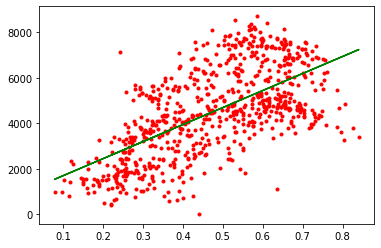

In [ ]:
# rysuję prostą regresji na wykresie z obserwacjami
plt.plot(df.atemp, df.cnt, 'r.')
plt.plot(df[['atemp']], theta[0] + df[['atemp']]*theta[1] , 'g') 
plt.show()

In [ ]:
# Na podstawie wytrenowanych współczynników theta, tworzę funkcję liniową (w funkcji pythonowej) zdolną do predykcji ceny samochodu 
def predict_price(x, t0, t1):
    res = t0 + t1*x
    return res

In [ ]:
# tworzę predykcję ilości wypożyczony rowerów na dzień, w którym unormalizowana temperatura odczuwalna wynosi 0.8

In [ ]:
predict_price(x=0.5, t0=theta[0], t1=theta[1])

4696.607453888583

### A teraz w ScikitLearn :)

In [ ]:
# dane
df = pd.read_csv(io.BytesIO(uploaded['bike_day.csv']))
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Jako zmienną zależną wybieram ponownie CNT, jako niezależne atemp, hum, windspeed i workingday (wszystkie cztery na raz)
X = df[['atemp', 'hum', 'windspeed', 'workingday']]
y = df['cnt']

In [ ]:
# trenuję model
reg = LinearRegression().fit(X, y)

In [ ]:
# sprawdzam wielkość interceptu i współczynników regresji

In [ ]:
reg.intercept_

3698.4373927964893

In [ ]:
reg.coef_

array([ 7486.28341042, -3174.17132979, -4407.19069508,   127.65517425])